In [ ]:
"""
README

kmeans clustering and embedding written by chatgpt...
any code after from sklearn.feature_extraction.text import CountVectorizer is probably chat generated

things were done in a weird way - but i was messing around with a few ideas.
never went back and modified code because i will throw this project into the trash
- finding non-cumulative kanji per jlpt level at all is a bit weird, should have just
gone straight to cumulative, because jlpt is cumulative

i disagree with using AI at all, or ML when there is a well defined, all inclusive, finite, discrete set of data to pull from
rendering predictions and speculation useless
"""

In [ ]:
import pandas as pd
import re

In [ ]:
def extract_unicode_block(s, unicode_block=r'[㐀-䶵一-鿋豈-頻]'):
    return re.findall(unicode_block, s)

In [ ]:
df = pd.read_csv("/content/jisho_jlpt_words_clean.csv")

In [ ]:
# non cumulative counts of kanji per jlpt level

jlpt_levels = ["n5", "n4", "n3", "n2", "n1"]
kanji_dict = dict()

for jlpt_level in jlpt_levels:
  kanji_dict[jlpt_level] = dict()

  for word in df[df["level"] == jlpt_level]["word"]:
    for kanji in extract_unicode_block(word):
      if kanji not in kanji_dict[jlpt_level]:
        kanji_dict[jlpt_level][kanji] = 1
      else:
        kanji_dict[jlpt_level][kanji] += 1

In [ ]:
# cumulative counts of kanji per jlpt level

kanji_dict_cumulative = dict()

for jlpt_level in jlpt_levels:
  kanji_dict_cumulative[jlpt_level] = kanji_dict[jlpt_level].copy()

  for temp_jlpt_level in kanji_dict_cumulative.keys():
    if temp_jlpt_level == jlpt_level:
      # if level isn't your current level, or you'll duplicate stuff
      continue

    for kanji in kanji_dict[temp_jlpt_level]:
      if kanji in kanji_dict_cumulative[jlpt_level]:
        kanji_dict_cumulative[jlpt_level][kanji] += kanji_dict[temp_jlpt_level][kanji]
      else:
        kanji_dict_cumulative[jlpt_level][kanji] = kanji_dict[temp_jlpt_level][kanji]

In [ ]:
def get_parts(df, kanji):
  sub_df = df[df["kanji"] == kanji]["parts"]

  assert len(sub_df) <= 1

  if len(sub_df) < 1:
    return kanji
  elif str(sub_df.iloc[0]) == "nan":
    return kanji

  return sub_df.iloc[0]

In [ ]:
# non cumulative counts of kanji per jlpt level

k_map_df = pd.read_csv("kanji_composition_map_txt.csv")

jlpt_levels = ["n5", "n4", "n3", "n2", "n1"]
kanji_parts_dict = dict()

for jlpt_level in jlpt_levels:
  kanji_parts_dict[jlpt_level] = dict()

  for kanji in kanji_dict[jlpt_level]:
    for part in get_parts(k_map_df, kanji):
      if part not in kanji_parts_dict[jlpt_level]:
        kanji_parts_dict[jlpt_level][part] = 1
      else:
        kanji_parts_dict[jlpt_level][part] += 1

In [ ]:
# cumulative counts of kanji per jlpt level

jlpt_levels = ["n5", "n4", "n3", "n2", "n1"]
kanji_parts_cumulative_dict = dict()

for jlpt_level in jlpt_levels:
  kanji_parts_cumulative_dict[jlpt_level] = kanji_parts_dict[jlpt_level].copy()

  for temp_jlpt_level in kanji_parts_cumulative_dict.keys():
    if temp_jlpt_level == jlpt_level:
      # if level isn't your current level, or you'll duplicate stuff
      continue

    for part in kanji_parts_dict[temp_jlpt_level]:
      if part not in kanji_parts_cumulative_dict[jlpt_level]:
        kanji_parts_cumulative_dict[jlpt_level][part] = kanji_parts_dict[temp_jlpt_level][part]
      else:
        kanji_parts_cumulative_dict[jlpt_level][part] += kanji_parts_dict[temp_jlpt_level][part]

In [ ]:
cumulative_parts_counts = []
cumulative_kanji_counts = []

for jlpt_level in jlpt_levels:
  cumulative_parts_counts.append(len(kanji_parts_cumulative_dict[jlpt_level]))
  cumulative_kanji_counts.append(len(kanji_dict_cumulative[jlpt_level]))

print(cumulative_parts_counts)
print(cumulative_kanji_counts)
print([(cumulative_kanji_counts[i] - cumulative_parts_counts[i]) for i in range(5)])

[378, 541, 745, 887, 1039]
[443, 756, 1312, 1630, 1973]
[65, 215, 567, 743, 934]


JLPT KANJI

In [ ]:
df = pd.read_csv("/content/jlpt_kanji_list.csv")
df["level"] = df["level"].str.lower()

assert len(df["kanji"].unique()) == len(df["kanji"])

level_dict = df.groupby("level")["kanji"].apply(list).to_dict()

cumulative_jlpt_kanji = dict()
for jlpt_level in jlpt_levels:
  cumulative_jlpt_kanji[jlpt_level] = level_dict[jlpt_level].copy()

  for temp_jlpt_level in cumulative_jlpt_kanji.keys():
    if temp_jlpt_level == jlpt_level:
      # if level isn't your current level, or you'll duplicate stuff
      continue

    for kanji in level_dict[temp_jlpt_level]:
      cumulative_jlpt_kanji[jlpt_level].append(kanji)

In [ ]:
cumulative_jlpt_kanji_parts = dict()
for jlpt_level in jlpt_levels:
  cumulative_jlpt_kanji_parts[jlpt_level] = set()

  for kanji in cumulative_jlpt_kanji[jlpt_level]:
    for part in get_parts(k_map_df, kanji):
      cumulative_jlpt_kanji_parts[jlpt_level].add(part)

In [ ]:
level_dict_counts = []
cumulative_jlpt_kanji_counts = []
cumulative_jlpt_kanji_parts_counts = []

for jlpt_level in jlpt_levels:
  level_dict_counts.append(len(level_dict[jlpt_level]))
  cumulative_jlpt_kanji_counts.append(len(cumulative_jlpt_kanji[jlpt_level]))
  cumulative_jlpt_kanji_parts_counts.append(len(cumulative_jlpt_kanji_parts[jlpt_level]))

print(level_dict_counts)
print(cumulative_jlpt_kanji_counts)
print(cumulative_jlpt_kanji_parts_counts)

[80, 170, 370, 380, 1136]
[80, 250, 620, 1000, 2136]
[91, 237, 445, 598, 947]


# my list has less kanji but some kanji that are not in jlpt kanji

In [ ]:
print(cumulative_jlpt_kanji_parts_counts) # jlpt
print(cumulative_parts_counts) # jlpt vocab

[91, 237, 445, 598, 947]
[378, 541, 745, 887, 1039]


In [ ]:
len(kanji_dict_cumulative["n1"].keys())
len(set(kanji_dict_cumulative["n1"].keys()))

1973

In [ ]:
c = 0
for k in set(kanji_parts_cumulative_dict["n1"].keys()):
  if k not in set(cumulative_jlpt_kanji_parts["n1"]):
    c += 1
c

181

In [ ]:
c = 0
for k in set(kanji_dict_cumulative["n1"].keys()):
  if k not in set(cumulative_jlpt_kanji["n1"]):
    c += 1

c

194

In [ ]:
len(set(cumulative_jlpt_kanji["n1"]).union(set(kanji_dict_cumulative["n1"].keys())))

2330

graphs

In [ ]:
print(cumulative_kanji_counts)
print(cumulative_parts_counts)

print(cumulative_jlpt_kanji_counts)
print(cumulative_jlpt_kanji_parts_counts)

[443, 756, 1312, 1630, 1973]
[378, 541, 745, 887, 1039]
[80, 250, 620, 1000, 2136]
[91, 237, 445, 598, 947]


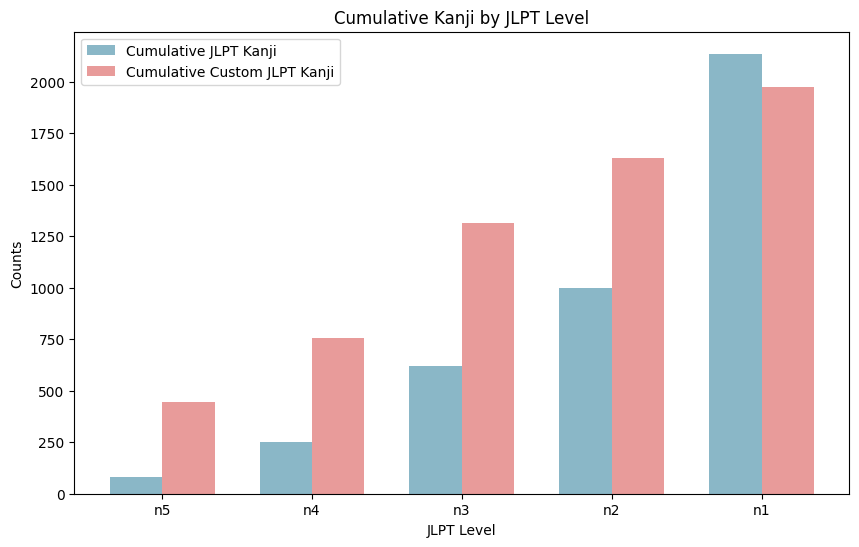

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

bar1_color = "#8ab7c7"
bar2_color = "#e89b9a"

x = np.arange(len(jlpt_levels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cumulative_jlpt_kanji_counts, width,
               label='Cumulative JLPT Kanji', color=bar1_color)
bars2 = ax.bar(x + width/2, cumulative_kanji_counts, width,
               label='Cumulative Custom JLPT Kanji', color=bar2_color)

ax.set_xlabel('JLPT Level')
ax.set_ylabel('Counts')
ax.set_title('Cumulative Kanji by JLPT Level')
ax.set_xticks(x)
ax.set_xticklabels(jlpt_levels)
ax.legend()

plt.show()


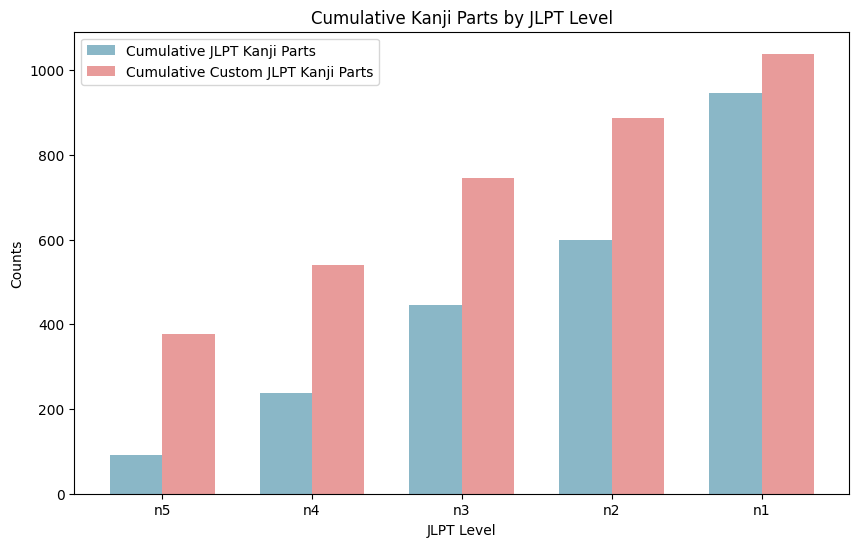

In [ ]:
x = np.arange(len(jlpt_levels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, cumulative_jlpt_kanji_parts_counts, width,
               label='Cumulative JLPT Kanji Parts', color=bar1_color)
bars2 = ax.bar(x + width/2, cumulative_parts_counts, width,
               label='Cumulative Custom JLPT Kanji Parts', color=bar2_color)

ax.set_xlabel('JLPT Level')
ax.set_ylabel('Counts')
ax.set_title('Cumulative Kanji Parts by JLPT Level')
ax.set_xticks(x)
ax.set_xticklabels(jlpt_levels)
ax.legend()

plt.show()

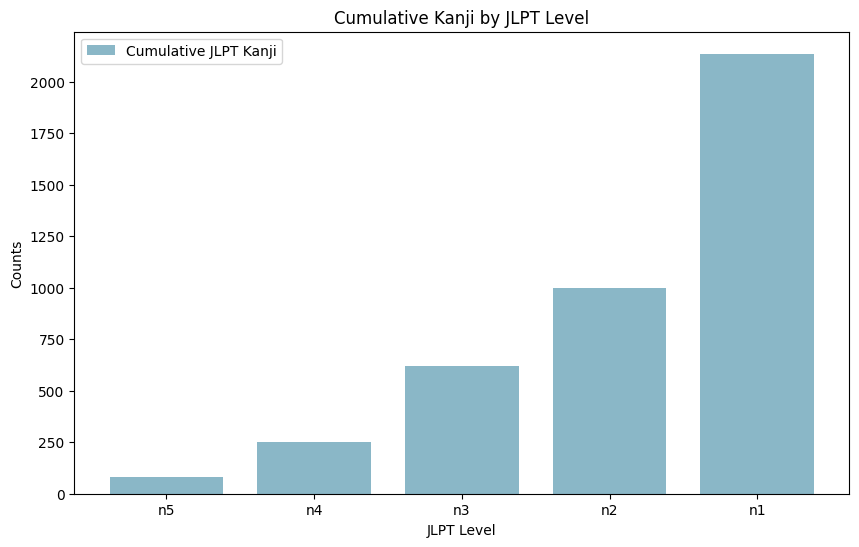

In [ ]:
width = 0.35 * 2.2

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x, cumulative_jlpt_kanji_counts, width,
               label='Cumulative JLPT Kanji', color=bar1_color)

ax.set_xlabel('JLPT Level')
ax.set_ylabel('Counts')
ax.set_title('Cumulative Kanji by JLPT Level')
ax.set_xticks(x)
ax.set_xticklabels(jlpt_levels)
ax.legend()

plt.show()


In [ ]:
df = pd.DataFrame(list(kanji_dict_cumulative["n1"].items()), columns=["kanji", "count"])
df = df.sort_values(by="count", ascending=False).reset_index(drop=True)
df["cumsum"] = df["count"].cumsum()
df["cumsum_perc"] = (df["cumsum"] / df["count"].sum()) * 100

df.head(4)

,kanji,count,cumsum,cumsum_perc
0,日,85,85,0.772868
1,一,73,158,1.436625
2,出,69,227,2.064012
3,人,66,293,2.664121


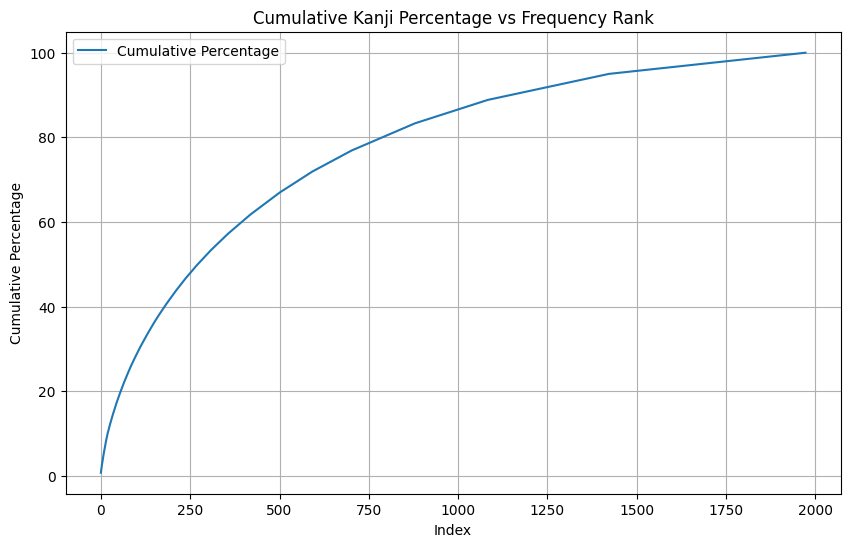

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['cumsum_perc'], linestyle='-', label='Cumulative Percentage')

plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Kanji Percentage vs Frequency Rank')
plt.grid()
plt.legend()

plt.show()

In [ ]:
df = pd.DataFrame(list(kanji_parts_cumulative_dict["n1"].items()), columns=["kanji", "count"])
df = df.sort_values(by="count", ascending=False).reset_index(drop=True)
df["cumsum"] = df["count"].cumsum()
df["cumsum_perc"] = (df["cumsum"] / df["count"].sum()) * 100

df.head(10)

,kanji,count,cumsum,cumsum_perc
0,氵,201,201,2.260205
1,口,197,398,4.475430
2,木,190,588,6.611942
3,亻,190,778,8.748454
4,扌,135,913,10.266502
5,日,124,1037,11.660857
6,糸,119,1156,12.998988
7,土,97,1253,14.089733
8,心,91,1344,15.113010
9,一,90,1434,16.125042


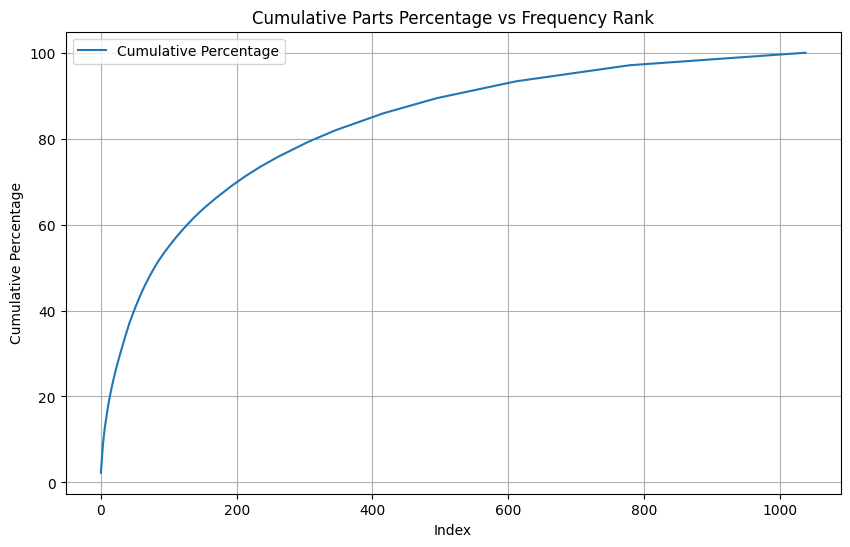

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(df)), df['cumsum_perc'], linestyle='-', label='Cumulative Percentage')

plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.title('Cumulative Parts Percentage vs Frequency Rank')
plt.grid()
plt.legend()

plt.show()

In [ ]:
arr = list(kanji_dict_cumulative["n1"].keys())
len(arr)

1973

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [ ]:
k_map_df = pd.read_csv("kanji_composition_map_txt.csv")
arr = list(kanji_dict_cumulative["n1"].keys())

df = k_map_df[k_map_df["kanji"].isin(arr)]
del df["note"]
df['parts'] = df['parts'].fillna(df['kanji'])

vectorizer = CountVectorizer(analyzer='char')
parts_matrix = vectorizer.fit_transform(df['parts']).toarray()

n_clusters = 80
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(parts_matrix)

df['cluster'] = clusters

df.head(4)



<ipython-input-97-17022b72bd1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parts'] = df['parts'].fillna(df['kanji'])
<ipython-input-97-17022b72bd1f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


,kanji,parts,cluster
2,椅,木奇,2
3,哀,衣亠口,6
4,愛,心爪冖夂,49
5,悪,心亜,49


In [ ]:
df["cluster"].value_counts()

,count
cluster,
37,345
3,90
8,75
6,73
2,68
...,...
78,3
4,2
24,1


In [ ]:
df[df["cluster"] == 140]

,kanji,parts,cluster


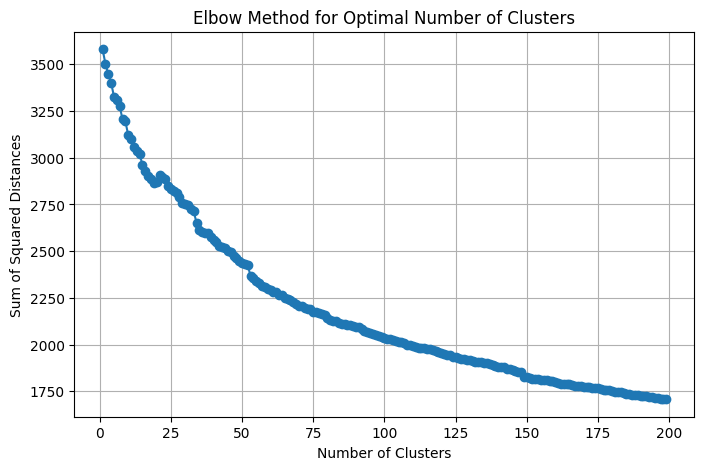

In [ ]:
vectorizer = CountVectorizer(analyzer='char')
parts_matrix = vectorizer.fit_transform(df['parts']).toarray()

inertia = []
cluster_range = range(1, 200)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(parts_matrix)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

In [ ]:
from collections import Counter

def most_common_parts(parts_list):
    combined_parts = ''.join(parts_list)
    part_counts = Counter(combined_parts)
    return part_counts.most_common()

df['cluster'] = KMeans(n_clusters=80, random_state=2).fit_predict(parts_matrix)

cluster_parts_summary = (
    df.groupby('cluster')['parts']
    .apply(most_common_parts)
    .reset_index(name='most_common_parts')
)

print(cluster_parts_summary)


    cluster                                  most_common_parts
0         0  [(宀, 28), (寸, 13), (元, 2), (女, 1), (妟, 1), (豕,...
1         1  [(力, 17), (口, 1), (甚, 1), (隹, 1), (堇, 1), (工, ...
2         2  [(亻, 72), (衣, 1), (韋, 1), (意, 1), (反, 1), (可, ...
3         3  [(艹, 32), (央, 1), (化, 1), (何, 1), (果, 1), (牙, ...
4         4  [(木, 70), (一, 2), (隹, 2), (攵, 2), (口, 2), (奇, ...
..      ...                                                ...
75       75   [(干, 4), (丷, 4), (土, 1), (十, 1), (冂, 1), (未, 1)]
76       76  [(衣, 7), (𢦏, 1), (龍, 1), (制, 1), (壮, 1), (代, 1...
77       77  [(夂, 5), (⺀, 2), (几, 1), (尺, 1), (龶, 1), (亦, 1...
78       78  [(釒, 19), (兑, 1), (㕣, 1), (監, 1), (竟, 1), (艮, ...
79       79  [(彳, 16), (攵, 2), (主, 1), (圣, 1), (夂, 1), (幺, ...

[80 rows x 2 columns]


<ipython-input-62-04d743c9abc0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = KMeans(n_clusters=80, random_state=42).fit_predict(parts_matrix)


In [ ]:
!apt-get install -y fonts-noto-cjk
!rm -rf ~/.cache/matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20220127+repack1-1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


In [ ]:
!apt-get -qq install fonts-noto-cjk

<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 27701 (\N{CJK UNIFIED IDEOGRAPH-6C35}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 20155 (\N{CJK UNIFIED IDEOGRAPH-4EBB}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 26408 (\N{CJK UNIFIED IDEOGRAPH-6728}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 25164 (\N{CJK UNIFIED IDEOGRAPH-624C}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 31992 (\N{CJK UNIFIED IDEOGRAPH-7CF8}) missing from current font.
  plt.tight_layout()
<ipython-input-105-d518eb056f2f>:22: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()

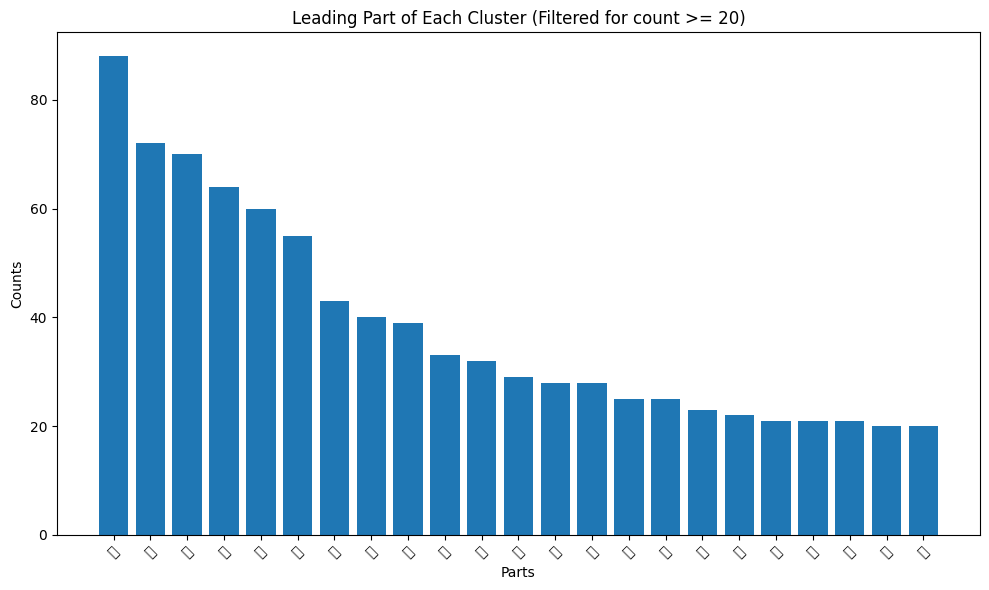

In [ ]:
from matplotlib import rcParams
!rm -rf ~/.cache/matplotlib
arr = []
for i, p in enumerate(cluster_parts_summary["most_common_parts"]):
  x, y = p[0]
  arr.append([x, y])

rcParams['font.family'] = '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc'

df = pd.DataFrame(arr, columns=["parts", "count"])
df = df.sort_values(by="count", ascending=False)
len(df[df["count"] >= 20])
df = df[df["count"] >= 20]

plt.figure(figsize=(10, 6))
plt.bar(df["parts"], df["count"])
plt.xlabel("Parts")
plt.ylabel("Counts")
plt.title("Leading Part of Each Cluster (Filtered for count >= 20)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df.sort_values(by="count", ascending=False)

,parts,count
6,氵,88
2,亻,72
4,木,70
8,扌,64
7,口,60
5,糸,55
73,日,43
17,土,40
18,訁,39
11,心,33


In [ ]:
df[df["cluster"] == 40]

,kanji,parts,cluster
18,威,女戌,40
30,医,匸矢,40
51,影,景彡,40
63,駅,馬尺,40
67,閲,門兑,40
...,...,...,...
2452,袖,衤由,40
2453,裾,衤居,40
2466,蹴,⻊就,40
2476,鍋,金咼,40
